# Выборка #14

In [1]:
%run init.py
%load_ext autoreload
%autoreload 2

### Обзор данных

In [2]:
dataset = Dataset(14)
dataset.summary()

+---------+-----------------------+----------------------+-------------+------------------+
| Выборка | Обучающая, # объектов | Тестовая, # объектов | # признаков | Доля класса 1, % |
+---------+-----------------------+----------------------+-------------+------------------+
|    14   |         300000        |        10000         |     100     |       20.8       |
+---------+-----------------------+----------------------+-------------+------------------+


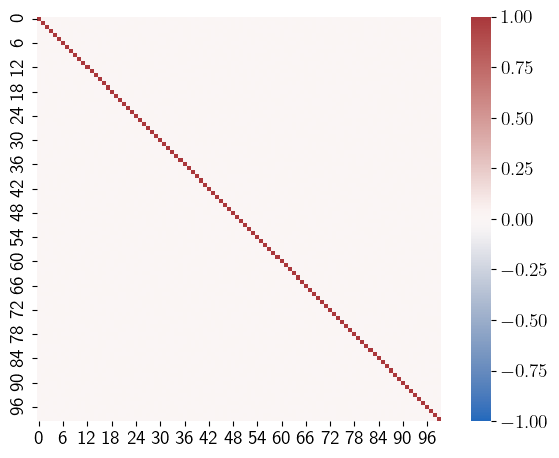

In [3]:
dataset.heatmap()

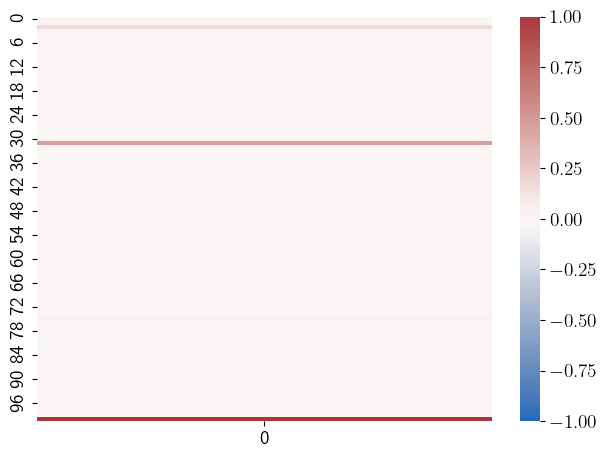

In [4]:
dataset.target_corr(annot=False)

In [5]:
#make_histplot(dataset.df)

### Проверка нормальности признаков

Используем критерий Шапиро-Уилка

In [3]:
pvals = [shapiro(dataset.X1[i])[1] for i in range(dataset.n_features)]

c:\phyton\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Получим достигаемые уровни значимости для нулевой гипотезы: "Распределение признака является нормальным"

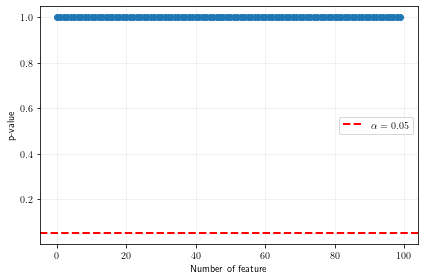

In [4]:
plt.plot(pvals, linestyle='None', marker='o')
plt.axhline(y=0.05, color='r', linestyle='dashed', label=r'$\alpha=0.05$')

plt.legend()
plt.xlabel('Number of feature')
plt.ylabel('p-value')
plt.grid(alpha=0.2)

plt.tight_layout()
plt.savefig(f'./fig/dataset_{dataset.dataset_id}/shapiro.pdf', bbox_inches='tight')
plt.show()

---

### Logistic Regression

100%|██████████| 100/100 [43:42<00:00, 26.22s/it]  


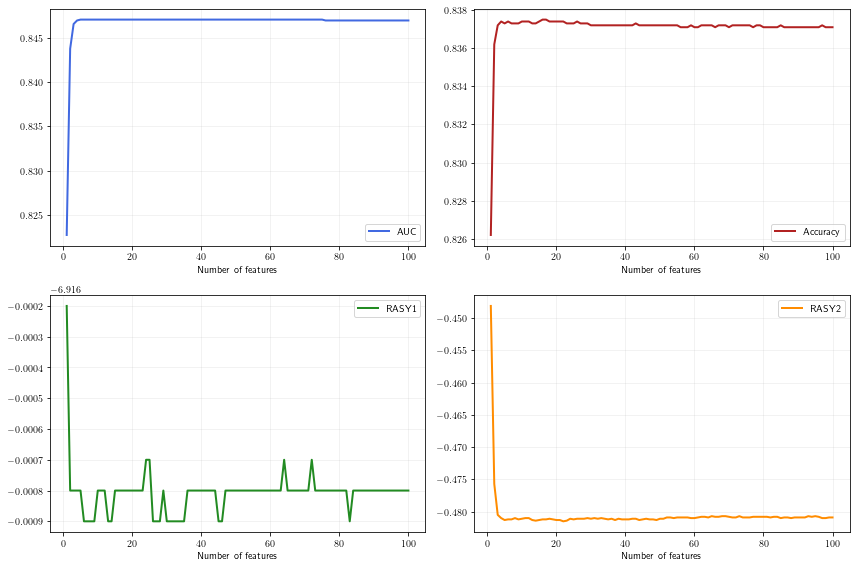

In [3]:
features_cols_lr = dataset.metrics_n_features_dependence(LogisticRegression())

In [6]:
Cs_lr = LogisticRegressionValidate(dataset, features_cols_lr, np.logspace(-10, 10, 21))

### Naive Bayes

100%|██████████| 100/100 [26:55<00:00, 16.16s/it]


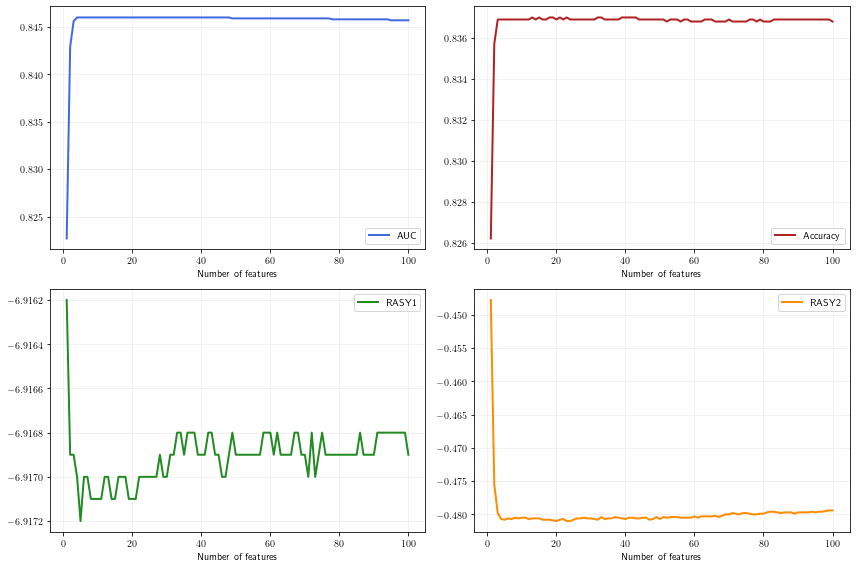

In [4]:
features_cols_gnb = dataset.metrics_n_features_dependence(GaussianNB())

### Saving aswers 

In [7]:
model_AUC = GaussianNB()
model_Accuracy = GaussianNB()
model_RASY1 = GaussianNB()
model_RASY2 = GaussianNB()
models = [model_AUC, model_Accuracy, model_RASY1, model_RASY2]

In [8]:
features_AUC, cols_AUC = features_cols_gnb['AUC']['features'], features_cols_gnb['AUC']['cols']
features_Accuracy, cols_Accuracy = features_cols_gnb['Accuracy']['features'], features_cols_gnb['Accuracy']['cols']
features_RASY1, cols_RASY1 = features_cols_gnb['RASY1']['features'], features_cols_gnb['RASY1']['cols']
features_RASY2, cols_RASY2 = features_cols_gnb['RASY2']['features'], features_cols_gnb['RASY2']['cols']
features_list = [features_AUC, features_Accuracy, features_RASY1, features_RASY2]
cols_list = [cols_AUC, cols_Accuracy, cols_RASY1, cols_RASY2]

In [9]:
t_Accuracy = features_cols_gnb['Accuracy']['t']
t_RASY1 = features_cols_gnb['RASY1']['t']
t_RASY2 = features_cols_gnb['RASY2']['t']
thresholds_list = [t_Accuracy, t_RASY1, t_RASY2]

In [10]:
dataset.save_ans(models, features_list, cols_list, thresholds_list)

In [11]:
cols_list

[array([31,  2, 75, 84], dtype=int64),
 array([31,  2, 75, 84, 78, 76, 67, 39, 60, 14, 11, 15, 71], dtype=int64),
 array([31,  2, 75, 84, 78], dtype=int64),
 array([31,  2, 75, 84, 78, 76, 67, 39, 60, 14, 11, 15, 71, 13, 40, 73, 82,
        17,  3, 53], dtype=int64)]

In [12]:
thresholds_list

[0.4747474747474748, 0.8484848484848485, 0.5454545454545455]